# Corrección de los datos

In [14]:
import pandas as pd
df = pd.read_csv('C:/Users/Usuario/Downloads/Proyecto 2/Base de Datos - Icfes.csv')
df.shape

(570464, 51)

In [15]:
df = df.drop(columns=['PERIODO', 'ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_COD_DANE_ESTABLECIMIENTO', 
                      'COLE_COD_DANE_SEDE', 'COLE_COD_DEPTO_UBICACION', 'COLE_CODIGO_ICFES', 'COLE_DEPTO_UBICACION', 
                      'COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL', 
                      'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 
                      'ESTU_DEPTO_RESIDE', 'ESTU_ESTUDIANTE', 'ESTU_ESTADOINVESTIGACION', 'ESTU_FECHANACIMIENTO', 
                      'ESTU_GENERO', 'ESTU_MCPIO_PRESENTACION', 'ESTU_NACIONALIDAD', 'ESTU_MCPIO_RESIDE', 
                      'ESTU_PRIVADO_LIBERTAD', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 
                      'FAMI_PERSONASHOGAR', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENELAVADORA'])


In [16]:
df_m = df.dropna()

In [17]:
paises_unicos = df_m['ESTU_PAIS_RESIDE'].dropna().unique()

# Municipios de ubicación de colegios
municipios_dict = dict(df_m[['COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION']].drop_duplicates().values)

# Departamentos de presentación de icfes
departamentos_dict = dict(df_m[['ESTU_COD_DEPTO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION']].drop_duplicates().values)

# Paises de residencia de los estudiantes
pais_dict = {pais: idx for idx, pais in enumerate(sorted(paises_unicos))}

In [18]:
# Obtener rango de puntaje asociado a cada nivel de desempeño
rangos_ingles = df_m.groupby('DESEMP_INGLES')['PUNT_INGLES'].agg(['min', 'max']).sort_index()

# Corregir los rangos para que no haya espacios de puntaje sin tener en consideración
rangos_desemp_ingles = {
    'A-': (0, 49),
    'A1': (50, 58),
    'A2': (59, 69),
    'B1': (70, 84),
    'B+': (85, 100)}


In [19]:
df_m['COLE_AREA_UBICACION'] = df_m['COLE_AREA_UBICACION'].map({'URBANO': 1, 'RURAL': 0})
df_m['COLE_BILINGUE'] = df_m['COLE_BILINGUE'].map({'N': 0, 'S': 1})
df_m['COLE_CALENDARIO'] = df_m['COLE_CALENDARIO'].map({'A': 1, 'B': 2, 'OTRO': 0})
df_m = df_m[df_m['COLE_CARACTER'] != 'NO APLICA']
df_m['COLE_CARACTER'] = df_m['COLE_CARACTER'].map({'ACADÉMICO': 0,'TÉCNICO/ACADÉMICO': 1,'TÉCNICO': 2})
df_m['COLE_GENERO'] = df_m['COLE_GENERO'].map({'MIXTO': 0, 'FEMENINO': 1, 'MASCULINO': 2})
df_m['COLE_JORNADA'] = df_m['COLE_JORNADA'].map({'COMPLETA': 0, 'UNICA': 0,'MAÑANA': 1, 'TARDE': 2, 'NOCHE': 3, 'SABATINA': 4})
df_m['FAMI_ESTRATOVIVIENDA'] = df_m['FAMI_ESTRATOVIVIENDA'].map({'Estrato 1': 1, 'Estrato 2': 2,'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6})
df_m['FAMI_TIENECOMPUTADOR'] = df_m['FAMI_TIENECOMPUTADOR'].map({'Si': 1, 'No': 0})
df_m['FAMI_TIENEINTERNET'] = df_m['FAMI_TIENEINTERNET'].map({'Si': 1, 'No': 0})
df_m['ESTU_PAIS_RESIDE'] = df_m['ESTU_PAIS_RESIDE'].map(pais_dict)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\3246422830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['COLE_AREA_UBICACION'] = df_m['COLE_AREA_UBICACION'].map({'URBANO': 1, 'RURAL': 0})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\3246422830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['COLE_BILINGUE'] = df_m['COLE_BILINGUE'].map({'N': 0, 'S': 1})
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\3246422830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [20]:
df_m.head()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_MCPIO_UBICACION,COLE_GENERO,COLE_JORNADA,COLE_MCPIO_UBICACION,ESTU_COD_DEPTO_PRESENTACION,ESTU_DEPTO_PRESENTACION,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,DESEMP_INGLES,PUNT_INGLES,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,PUNT_C_NATURALES,PUNT_LECTURA_CRITICA,PUNT_GLOBAL
0,1,0,0,0,11001,0,1,BOGOTÁ D.C.,25.0,CUNDINAMARCA,...,2,1,1,A-,42,43,46,52,45,231
1,0,1,2,0,25175,0,0,CHIA,11.0,BOGOTÁ,...,4,1,1,B1,80,68,58,75,64,337
2,1,1,2,0,11001,0,0,BOGOTÁ D.C.,11.0,BOGOTÁ,...,5,1,1,B+,90,61,72,81,72,365
4,1,0,1,0,5001,0,4,MEDELLIN,5.0,ANTIOQUIA,...,1,0,0,A-,45,39,36,42,39,197
5,1,0,2,0,76001,0,1,CALI,76.0,VALLE,...,3,1,1,A-,47,48,54,52,52,256


In [21]:
df_m = df_m.drop(columns=['COLE_MCPIO_UBICACION', 'ESTU_DEPTO_PRESENTACION', 'DESEMP_INGLES' ,'PUNT_MATEMATICAS',
                       'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL'])

# Exploración de los datos

In [22]:
# Descripción numérica del dataframe modificado
df_m.describe()

,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_COD_MCPIO_UBICACION,COLE_GENERO,COLE_JORNADA,ESTU_COD_DEPTO_PRESENTACION,ESTU_PAIS_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,PUNT_INGLES
count,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000,496711.000000
mean,0.877154,0.019116,1.020813,0.583019,33358.879471,0.053329,1.277928,33.069910,18.007747,1.906304,0.623991,0.537647,50.954982
std,0.328261,0.136932,0.184001,0.681900,26989.919237,0.265224,1.059579,26.989472,0.467321,1.006833,0.484383,0.498581,11.570943
min,0.000000,0.000000,0.000000,0.000000,5001.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,11001.000000,0.000000,1.000000,11.000000,18.000000,1.000000,0.000000,0.000000,43.000000
50%,1.000000,0.000000,1.000000,0.000000,20238.000000,0.000000,1.000000,20.000000,18.000000,2.000000,1.000000,1.000000,49.000000
75%,1.000000,0.000000,1.000000,1.000000,54874.000000,0.000000,2.000000,54.000000,18.000000,2.000000,1.000000,1.000000,54.000000
max,1.000000,1.000000,2.000000,2.000000,99773.000000,2.000000,4.000000,99.000000,49.000000,6.000000,1.000000,1.000000,100.000000


In [23]:
# Información general
print("\nInformación general del DataFrame:")
print(df.info())

# Valores nulos por columna
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# Porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().mean() * 100).round(2))

# Tipos de variables
print("\nTipos de datos por columna:")
print(df.dtypes)

# Resumen estadístico
print("\nResumen estadístico de variables:")
print(df.describe(include='all'))

# Variables categóricas
print("\nResumen de variables categóricas:")
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())
    print("Valores únicos:", df[col].nunique())

# Columnas únicas o constantes
print("\nColumnas con un solo valor único:")
print([col for col in df.columns if df[col].nunique() == 1])


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570464 entries, 0 to 570463
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   COLE_AREA_UBICACION          570464 non-null  object 
 1   COLE_BILINGUE                500737 non-null  object 
 2   COLE_CALENDARIO              570464 non-null  object 
 3   COLE_CARACTER                566761 non-null  object 
 4   COLE_COD_MCPIO_UBICACION     570464 non-null  int64  
 5   COLE_GENERO                  570464 non-null  object 
 6   COLE_JORNADA                 570464 non-null  object 
 7   COLE_MCPIO_UBICACION         570464 non-null  object 
 8   ESTU_COD_DEPTO_PRESENTACION  570378 non-null  float64
 9   ESTU_DEPTO_PRESENTACION      570378 non-null  object 
 10  ESTU_PAIS_RESIDE             570464 non-null  object 
 11  FAMI_ESTRATOVIVIENDA         570328 non-null  object 
 12  FAMI_TIENECOMPUTADOR  

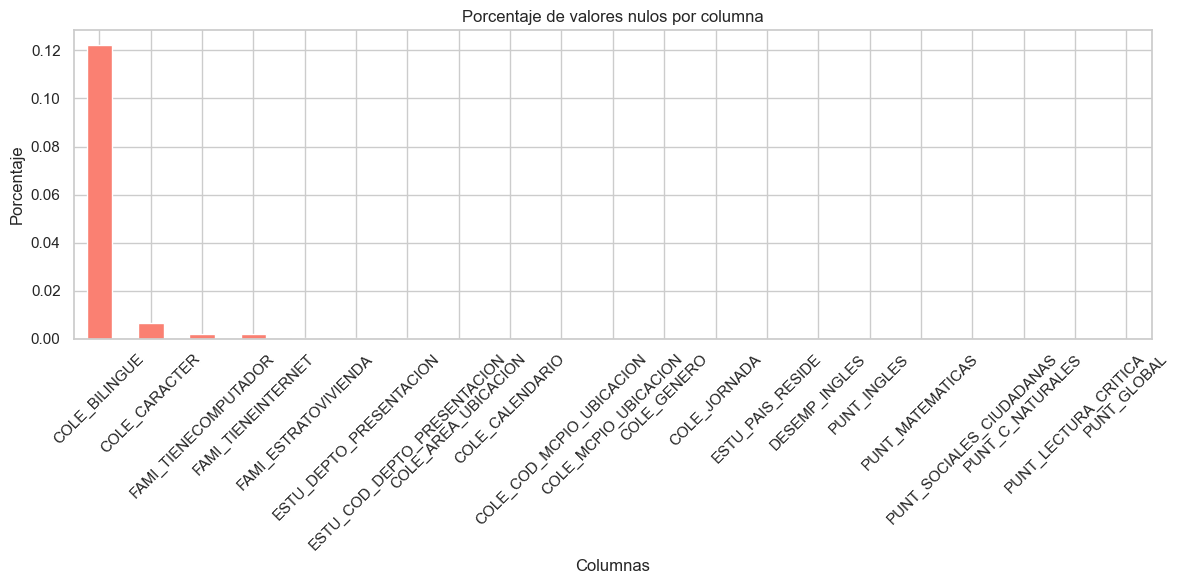

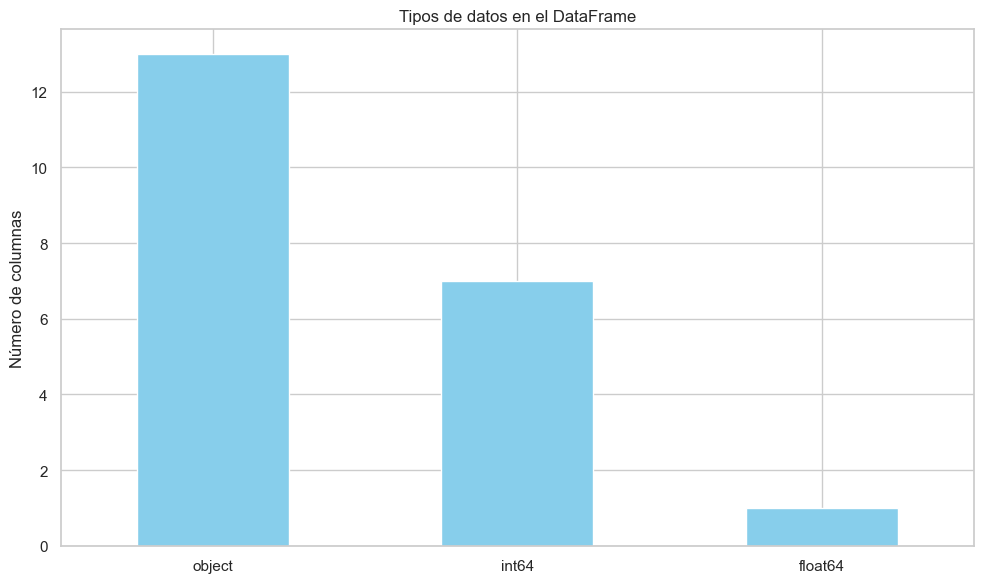

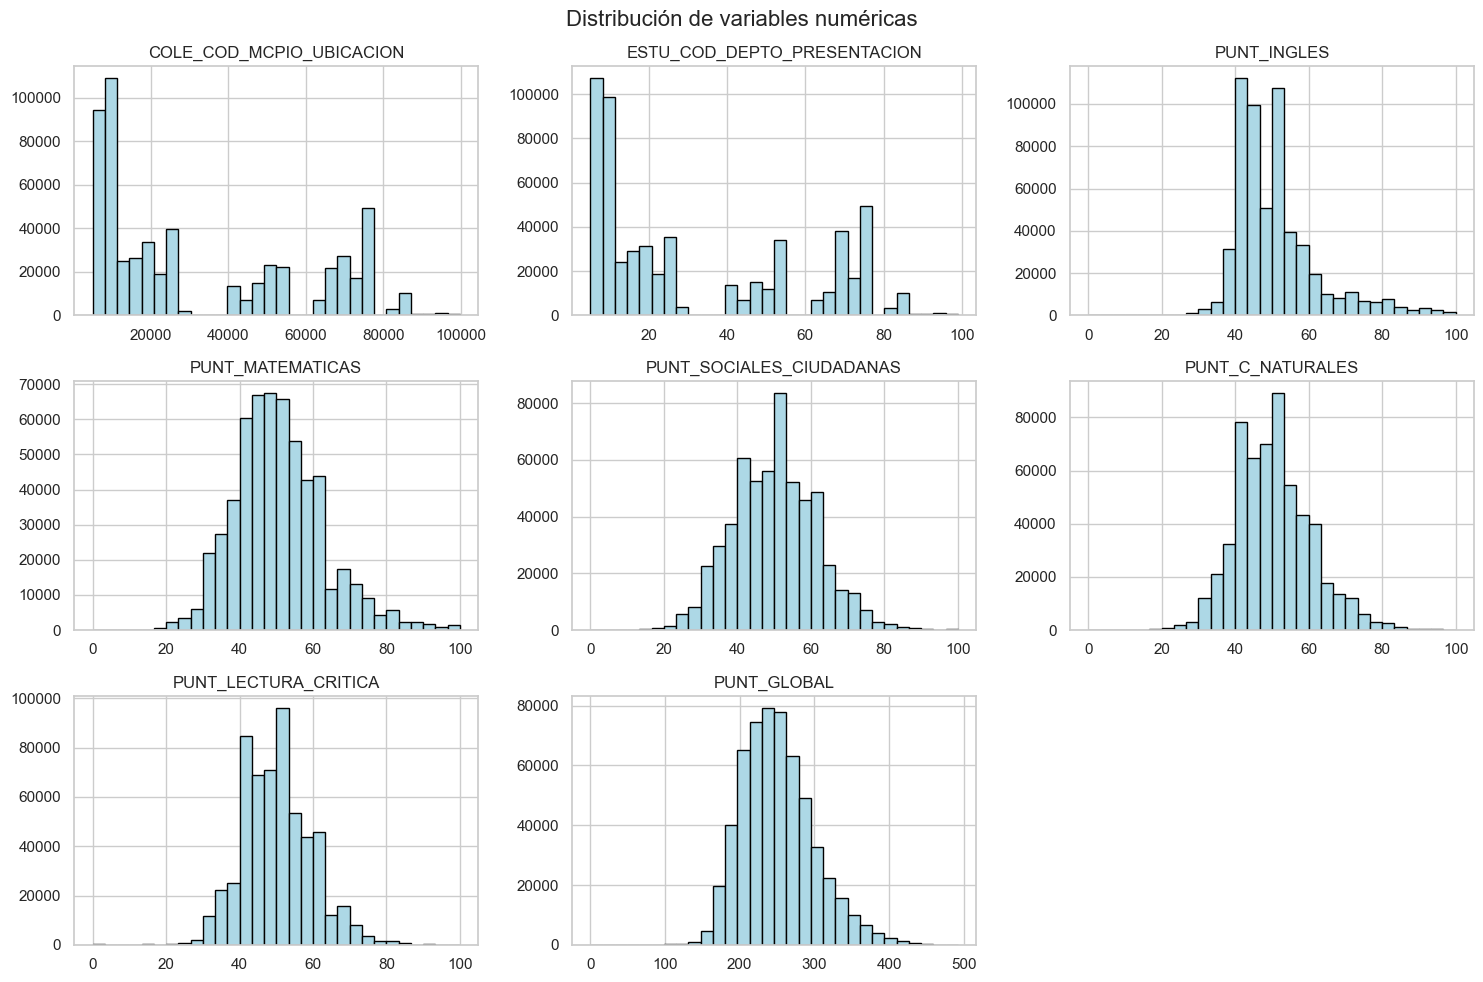

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


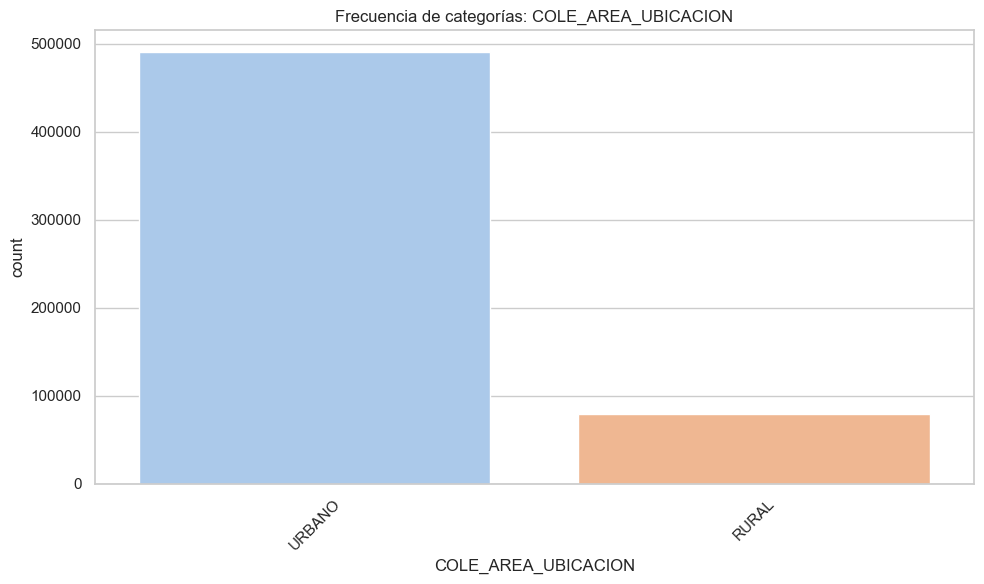

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


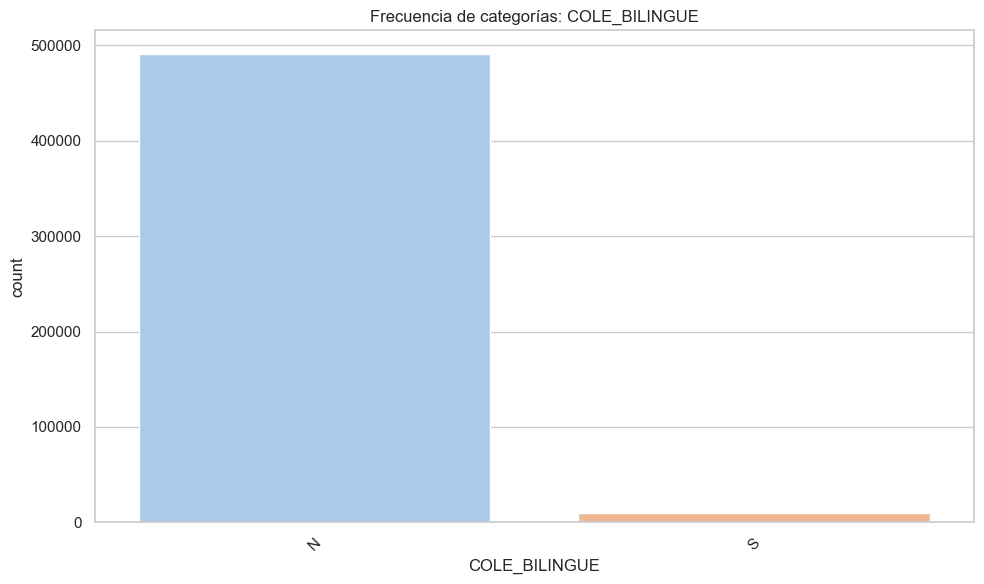

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


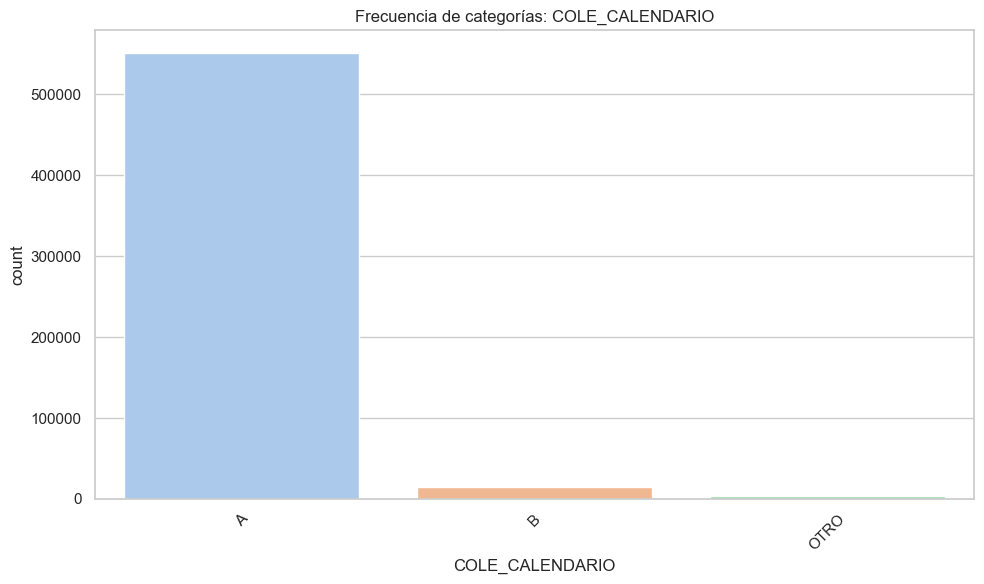

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


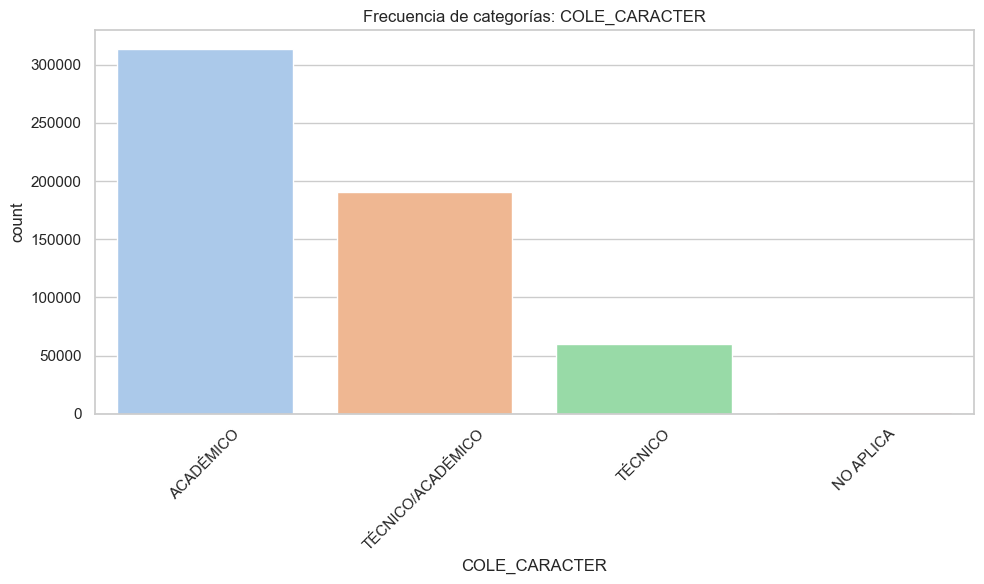

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


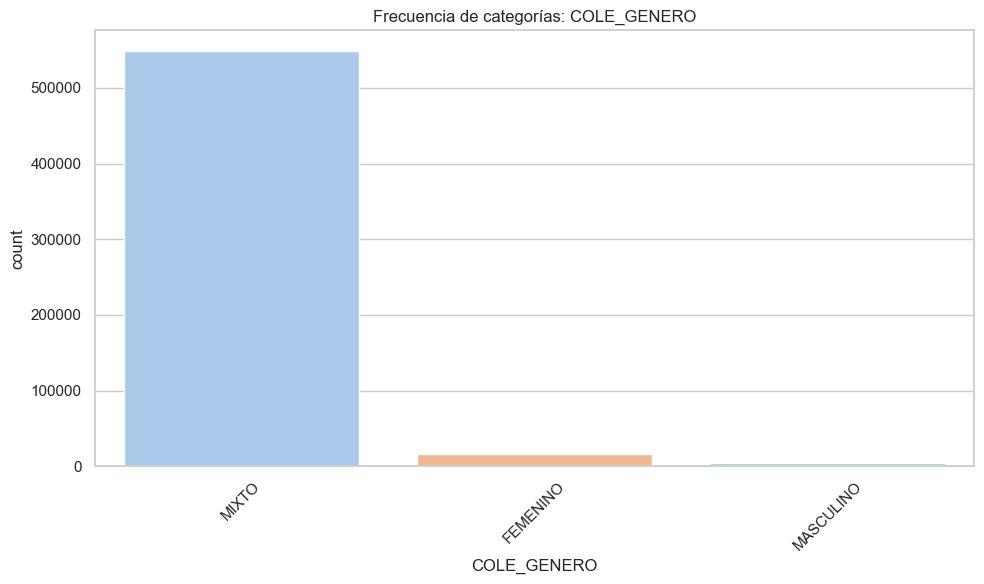

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


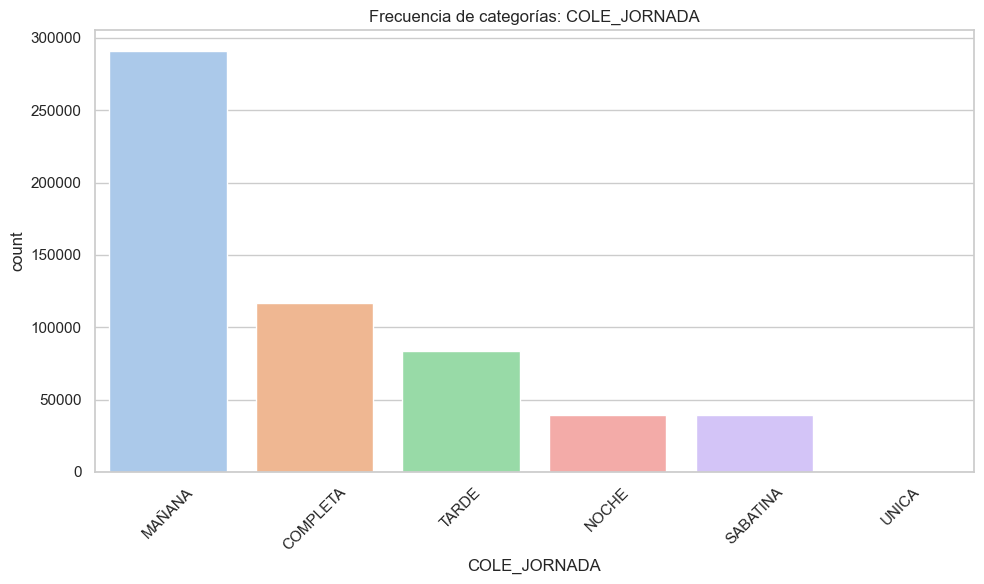

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


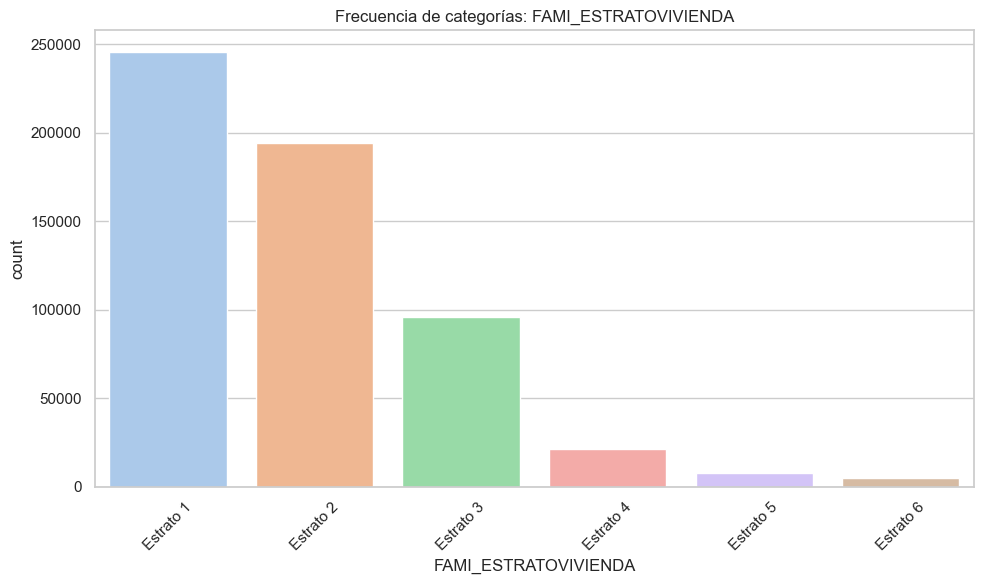

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


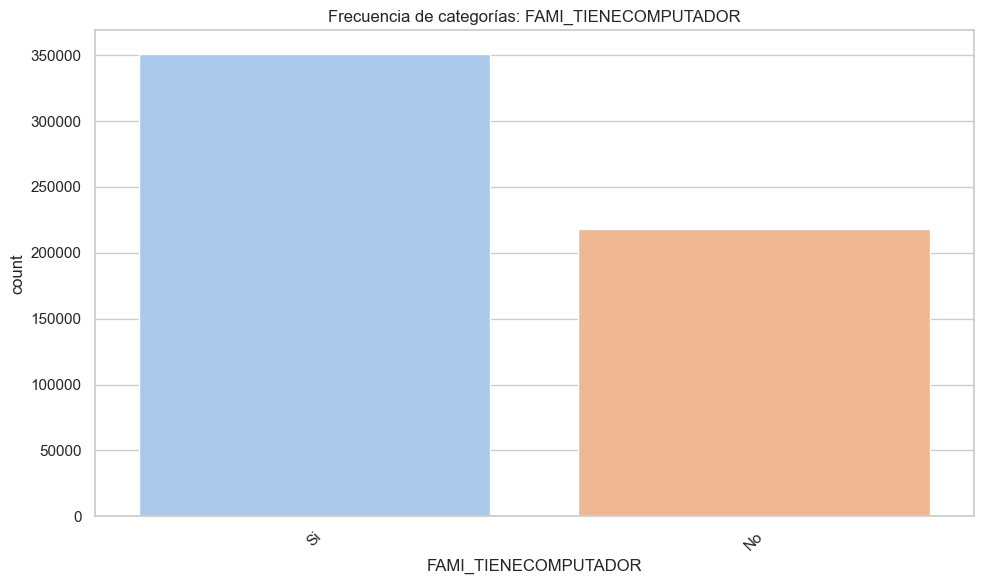

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


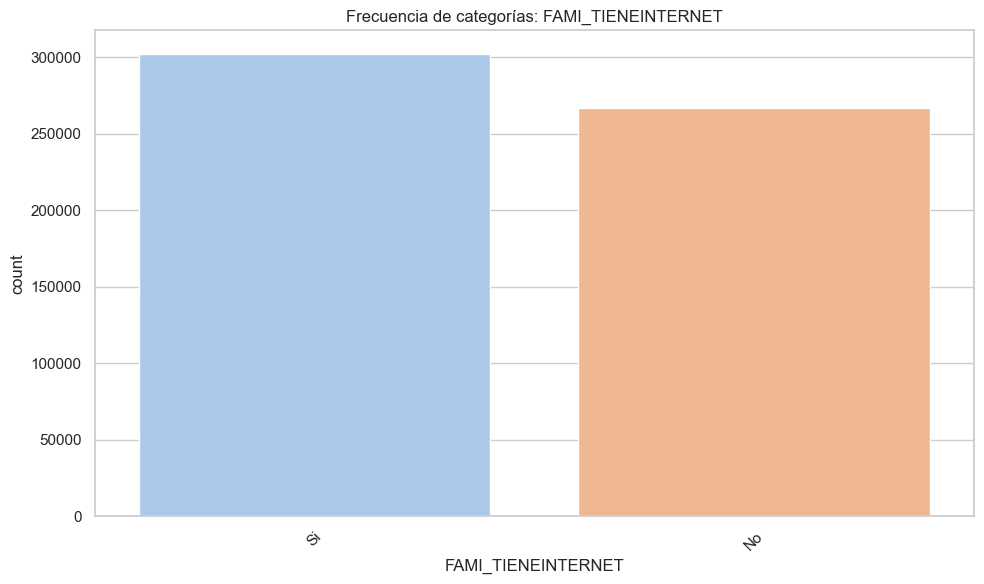

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2259431052.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')


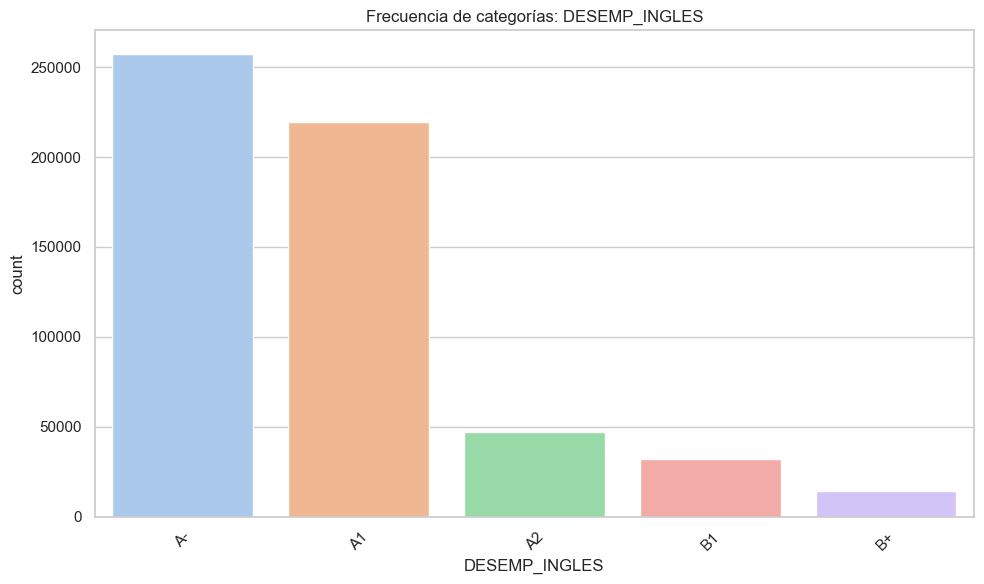

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Valores nulos por columna
plt.figure(figsize=(12, 6))
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Porcentaje de valores nulos por columna')
plt.ylabel('Porcentaje')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conteo de tipos de variables
types = df.dtypes.value_counts()
plt.figure()
types.plot(kind='bar', color='skyblue')
plt.title('Tipos de datos en el DataFrame')
plt.ylabel('Número de columnas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Distribuciones de variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# Conteo de valores en variables categóricas (solo las con menos de 20 categorías)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    if df[col].nunique() <= 20:
        plt.figure()
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
        plt.title(f'Frecuencia de categorías: {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


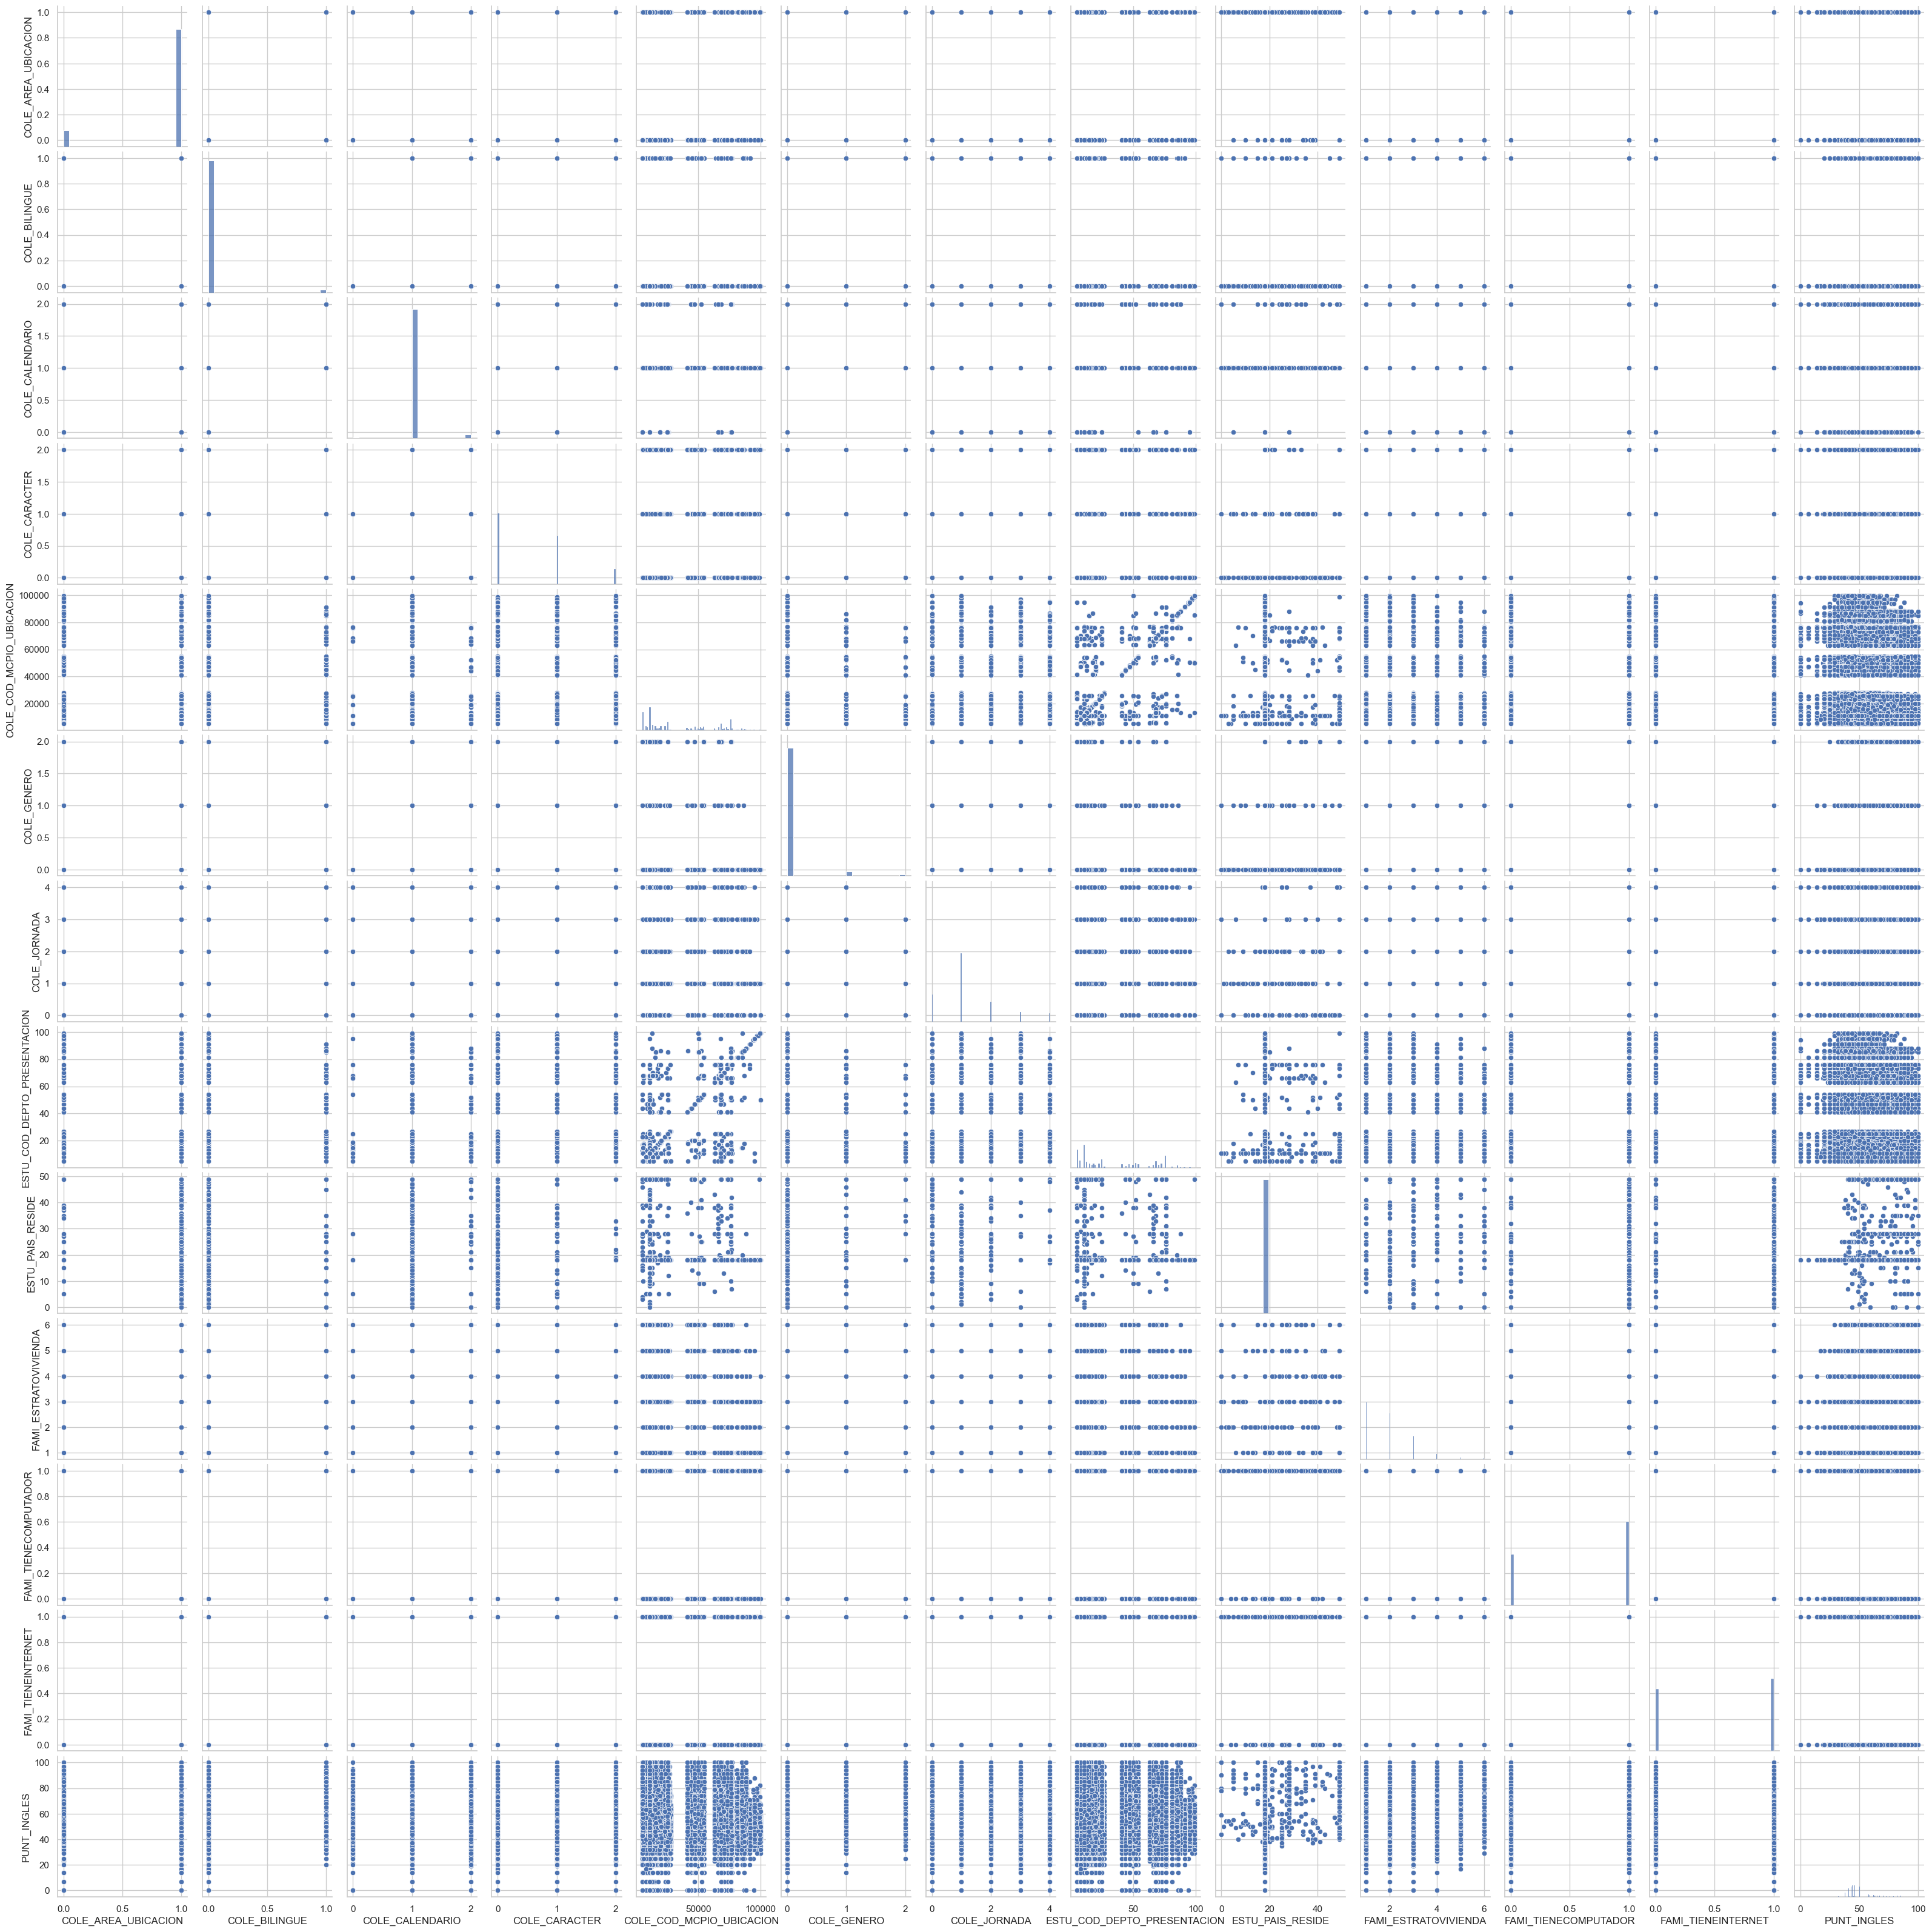

In [25]:
%matplotlib inline
sns.pairplot(df_m,)

<Axes: >

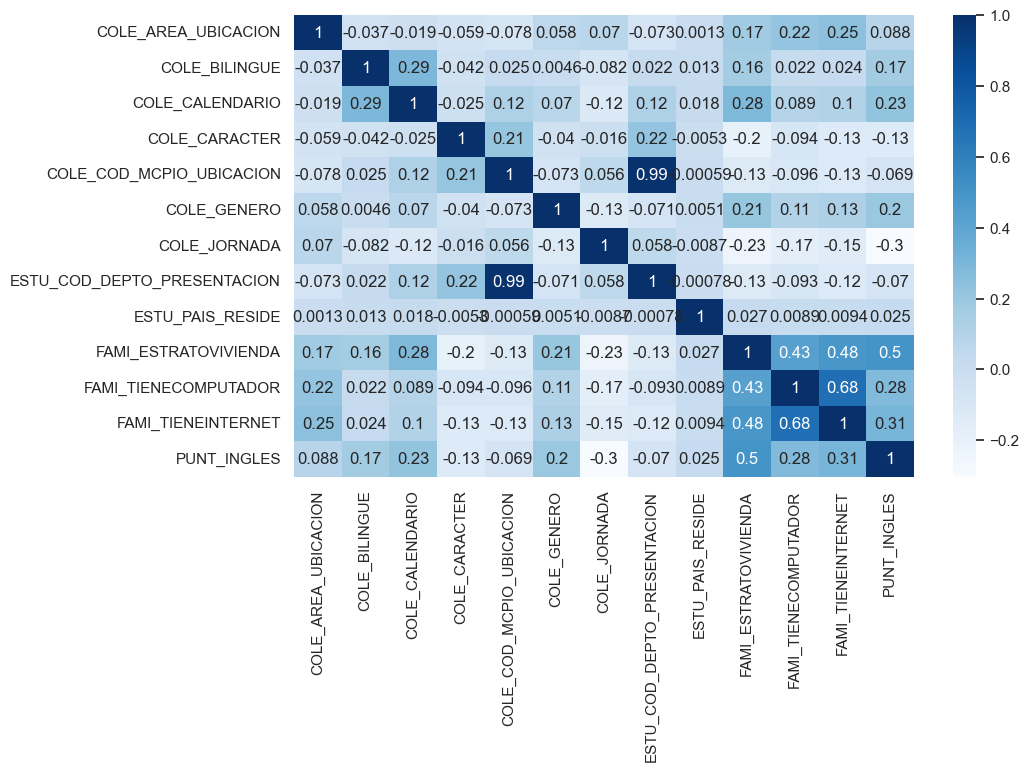

In [26]:
corr = df_m.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

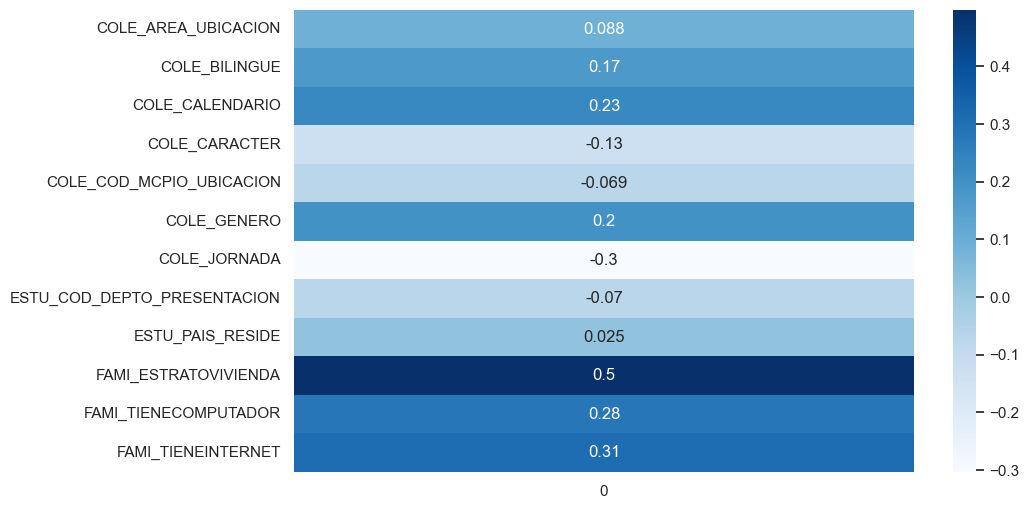

In [27]:
corrw = df_m.drop(['PUNT_INGLES'], axis=1).corrwith(df_m['PUNT_INGLES'])
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\2839152009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='COLE_JORNADA', y='PUNT_INGLES', palette='pastel')


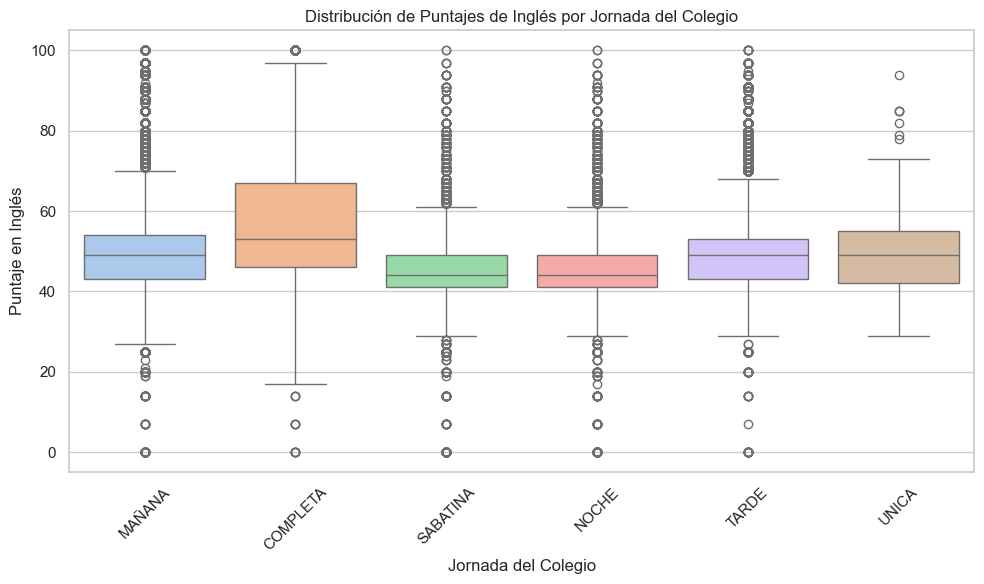

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='COLE_JORNADA', y='PUNT_INGLES', palette='pastel')
plt.title('Distribución de Puntajes de Inglés por Jornada del Colegio')
plt.xlabel('Jornada del Colegio')
plt.ylabel('Puntaje en Inglés')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\704132605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='COLE_CALENDARIO', y='PUNT_INGLES', estimator='mean', errorbar='sd', palette='viridis')


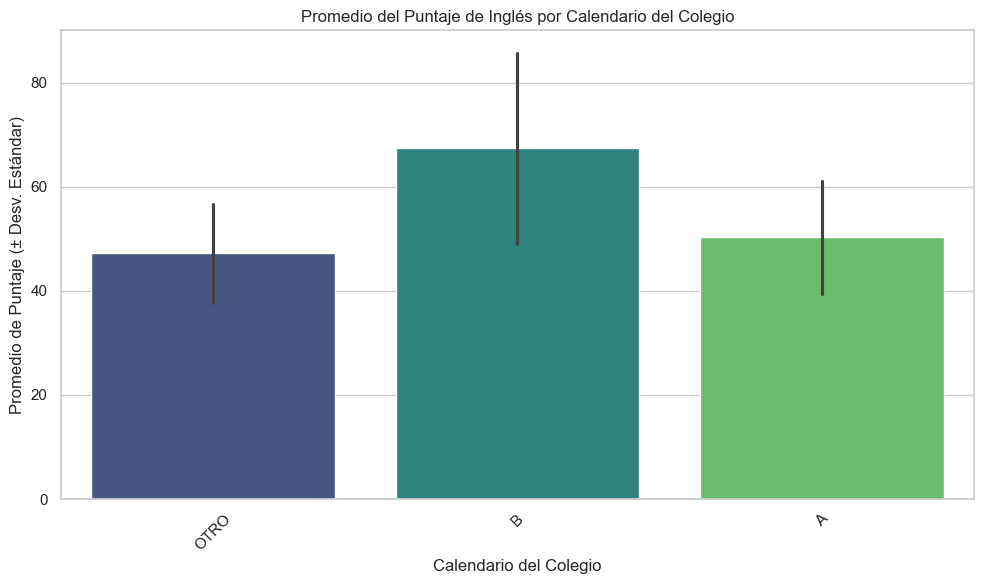

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='COLE_CALENDARIO', y='PUNT_INGLES', estimator='mean', errorbar='sd', palette='viridis')
plt.title('Promedio del Puntaje de Inglés por Calendario del Colegio')
plt.xlabel('Calendario del Colegio')
plt.ylabel('Promedio de Puntaje (± Desv. Estándar)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3384\3687665284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='COLE_BILINGUE', y='PUNT_INGLES', palette='coolwarm')


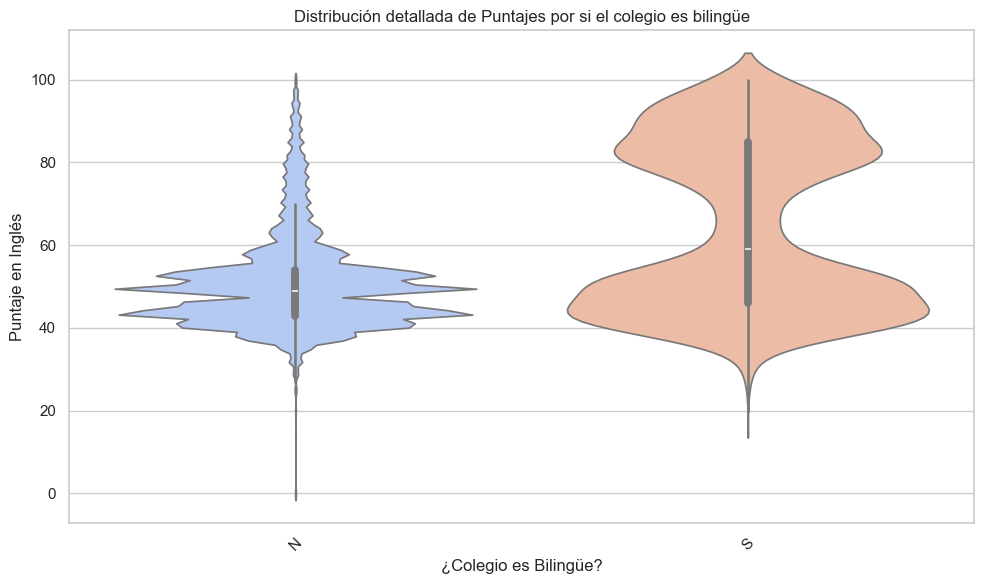

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='COLE_BILINGUE', y='PUNT_INGLES', palette='coolwarm')
plt.title('Distribución detallada de Puntajes por si el colegio es bilingüe')
plt.xlabel('¿Colegio es Bilingüe?')
plt.ylabel('Puntaje en Inglés')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

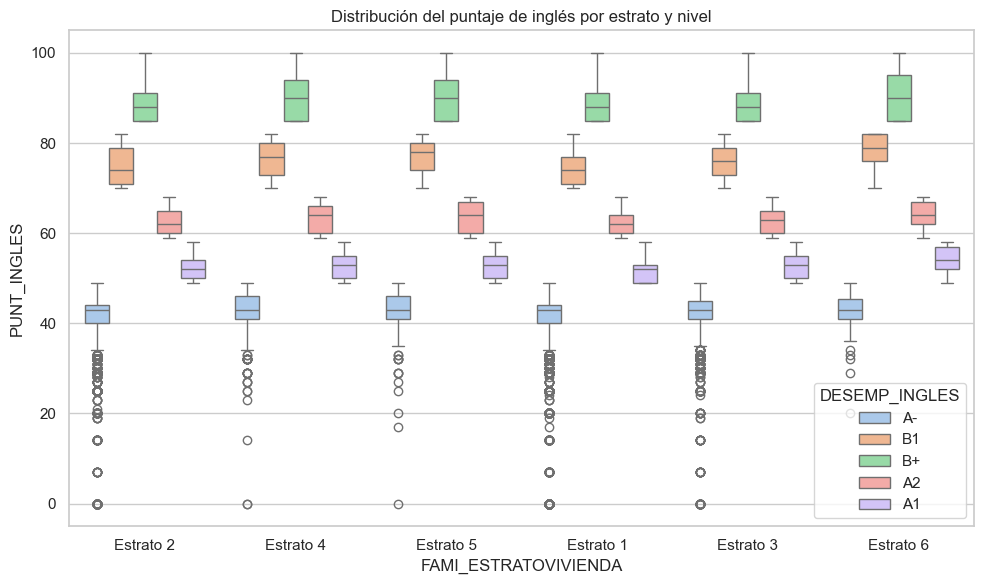

In [35]:
sns.boxplot(data=df, x='FAMI_ESTRATOVIVIENDA', y='PUNT_INGLES', hue='DESEMP_INGLES', palette='pastel')
plt.title('Distribución del puntaje de inglés por estrato y nivel')
plt.tight_layout()
plt.show()

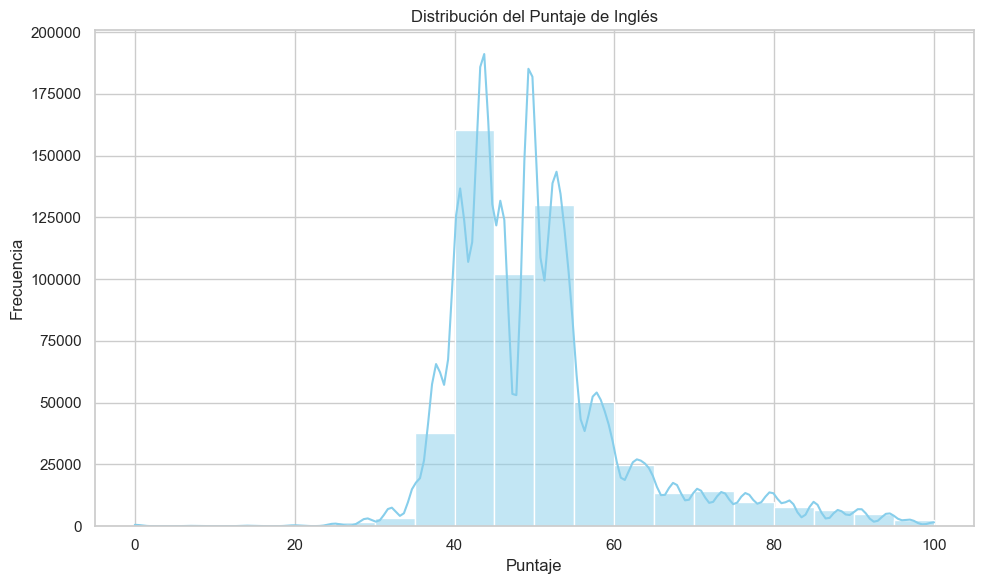

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df['PUNT_INGLES'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del Puntaje de Inglés')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Dataset final para el uso

In [ ]:
data = df_m